In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib ipympl

In [2]:
data = (np.loadtxt('d1.txt', delimiter=',')).T
# data = (np.loadtxt('d2.txt', delimiter=',')).T
# data = (np.loadtxt('d3.txt', delimiter=',')).T
# data = (np.loadtxt('d4.txt', delimiter=',')).T

x, y = data[0], data[1]

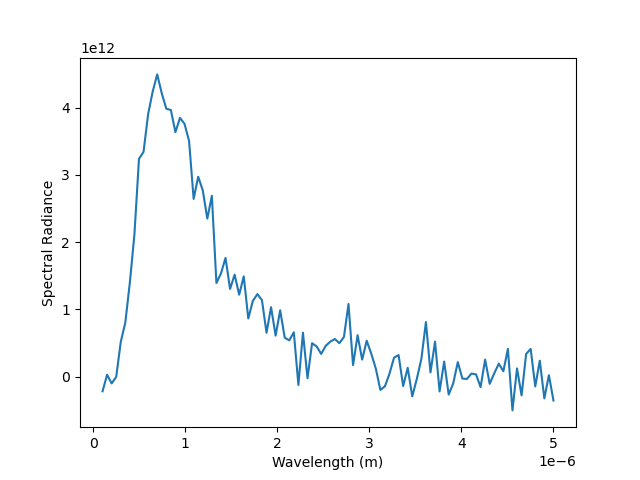

In [3]:
plt.figure()
plt.xlabel('Wavelength (m)')
plt.ylabel('Spectral Radiance')
plt.plot(x, y)

In [4]:
# Defining the function and constants
def planck(l, T, c, h, k):
    B = 2 * h * (c**2) / ( (l**5) * (np.exp(h*c/(l*k*T)) - 1) )
    return B

h = 6.626e-34  # Planck's constant in J·s
c = 3.0e8      # Speed of light in m/s
k = 1.38e-23   # Boltzmann's constant in J/K

In [5]:
# Making a plot function for our specific needs

def make_plot(T, c, h, k):
    plt.figure()
    plt.plot(x, y, label='Data')
    plt.plot(x, planck(x, T, c, h, k), label='Fitted Curve', linestyle='--')
    plt.xlabel('Wavelength (m)')
    plt.ylabel('Spectral Radiance')
    plt.legend()
    plt.show()

In [6]:
# Printing the parameters and their standard deviation

def make_table(params, params_cov):
    std_dev = [np.sqrt(params_cov[i][i]) for i in range(len(params_cov))]
    output = np.array([params, std_dev]).T
    print(f"{'Value':<30} {'Standard Deviation':<60}")
    for row in output:
        print(f"{row[0]:<30} {row[1]:<60}")

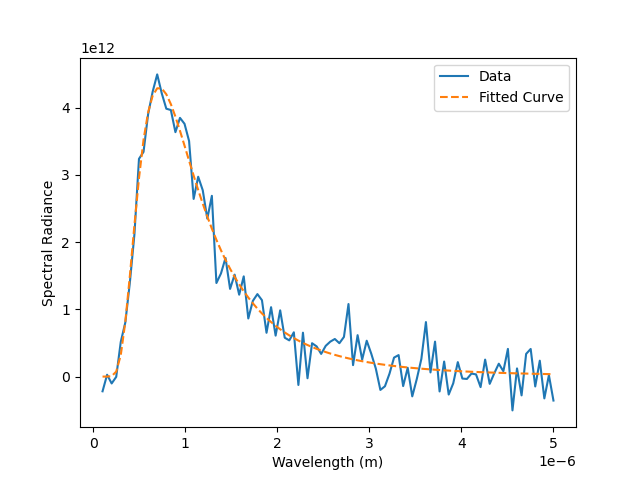

Value                          Standard Deviation                                          
5583.436841840805              2923550519.1022973                                          
217462053.56022674             56579328591002.36                                           
1.2255452470536629e-33         6.37725419983078e-28                                        
1.3409113526085338e-23         7.405511127836345e-18                                       


In [7]:
# Trying to estimate all (4) parameters at once, giving an initial guess of T = 5000
initial_guess = [5000, c, h, k]
params, params_cov = curve_fit(planck, x, y, p0=initial_guess, maxfev=1000)

std_dev = [np.sqrt(params_cov[i][i]) for i in range(len(params_cov))]

make_plot(*params)

make_table(params, params_cov)

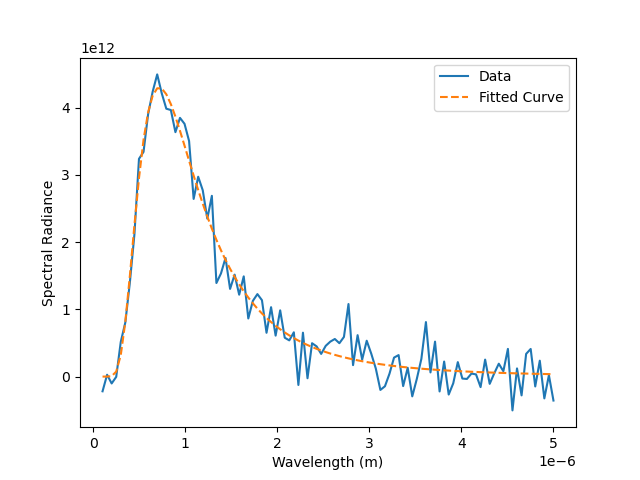

Value                          Standard Deviation                                          
4511.220390399117              3877672301.8521476                                          
273647288.33260316             60795332154063.266                                          
7.739515410680496e-34          3.4340032471309773e-28                                      
1.3188642365801177e-23         1.0537701274605768e-17                                      


In [8]:
# Trying to estimate all (4) parameters at once, giving an initial guess of T = 4000

initial_guess = [4000, c, h, k]
params, params_cov = curve_fit(planck, x, y, p0=initial_guess, maxfev=1000)

std_dev = [np.sqrt(params_cov[i][i]) for i in range(len(params_cov))]

make_plot(*params)

make_table(params, params_cov)

In [9]:
####### The following cells are performing the partial application method #######

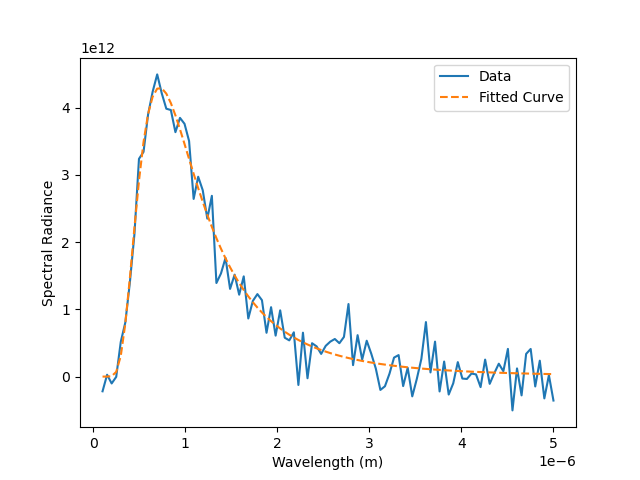

Value                          Standard Deviation                                          
4023.310703322575              14.278397324851195                                          


In [10]:
# Trying to estimate T, given we know the rest of the constants

initial_guess = [5000]
params, params_cov = curve_fit(lambda l, T: planck(l, T, c, h, k), x, y, p0=initial_guess, maxfev=1000)

std_dev = [np.sqrt(params_cov[i][i]) for i in range(len(params_cov))]

make_plot(*params, c, h, k)

make_table(params, params_cov)

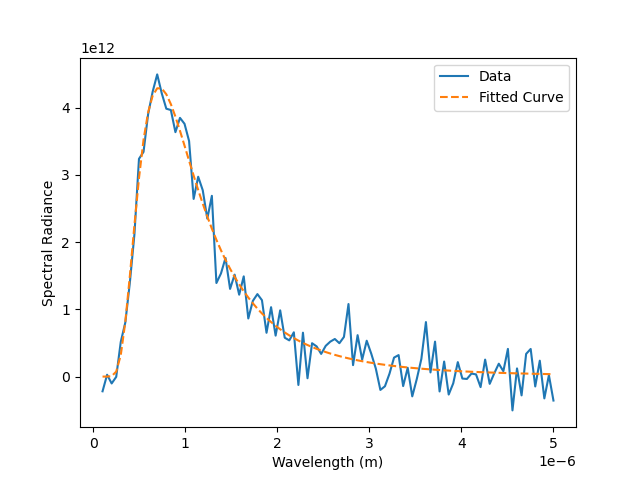

Value                          Standard Deviation                                          
6.439525442272954e-34          3.547809782056244e-35                                       
1.348902678143634e-23          5.954927374323668e-25                                       


In [11]:
# Trying to estimate h, k given we know T and c

T = 4023.31  # Temperature in K
initial_guess = [h*1.1, k*0.9]
params, params_cov = curve_fit(lambda l, h, k: planck(l, T, c, h, k), x, y, p0=initial_guess, maxfev=1000)

std_dev = [np.sqrt(params_cov[i][i]) for i in range(len(params_cov))]

make_plot(T, c, *params)

make_table(params, params_cov)